In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Cliente/anaconda3/Library/bin/graphviz'

## Modelagem e Limpeza dos dados

In [2]:
# Leitura dos dados do CSV
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
# Remoção da coluna desnecessária "Unnamed: 0"
dados = dados[["mileage_per_year", "model_year", "price", "sold"]]

dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [4]:
# Mudança dos nomes das colunas para melhor leitura dos dados
mapa = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}

dados = dados.rename(columns = mapa)

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [5]:
# Troca do valores da coluna vendida para ficar em numeros
troca = {
    "yes" : 1,
    "no" : 0
}

dados.vendido = dados.vendido.map(troca)

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [6]:
from datetime import datetime

# Adicição de uma nova Coluna para indicar a idade do carro p/ melhor analise dos dados
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,21
1,7843,1998,40557.96,1,23
2,7109,2006,89627.50,0,15
3,26823,2015,95276.14,0,6
4,7935,2014,117384.68,1,7


In [7]:
# Criação de uma coluna km_por_ano p/ adequar ao padrão brasileiro
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,21801,2000,30941.02,1,21,35085.22134
1,7843,1998,40557.96,1,23,12622.05362
2,7109,2006,89627.50,0,15,11440.79806
3,26823,2015,95276.14,0,6,43167.32682
4,7935,2014,117384.68,1,7,12770.11290


In [8]:
# Remoção das colunas que não vão ser mais utilizadas
dados = dados.drop(columns = ["milhas_por_ano", "ano_do_modelo"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [9]:
# Seperação dos dados de analise e dos dados de resultado
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

## Teste dos Classificadores Linear e Não-Linear

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi 58.00%


C:\Users\Cliente\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi 78.24%


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Criação de uma nova escala para melhorar a analise dos dados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi 77.48%


## Classificadores bobos - Dummy Classifier

In [13]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto do dummy_stratified foi %.2f%%" % taxa_acerto)

A taxa de acerto do dummy_stratified foi 52.44%


C:\Users\Cliente\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [14]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto do dummy_mostfrequent foi %.2f%%" % taxa_acerto)

A taxa de acerto do dummy_mostfrequent foi 50.68%


## Árvores de Decisão

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Definição de profundidade máxima da árvore
model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_treino_x, treino_y)
previsoes = model.predict(raw_teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi 79.28%


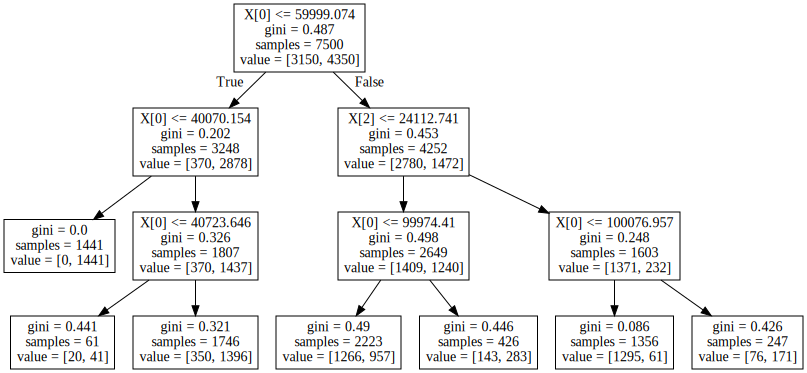

In [27]:
# Libs para vizualização da estrutura da árvore de decisão
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model)

grafico = graphviz.Source(dot_data)

grafico

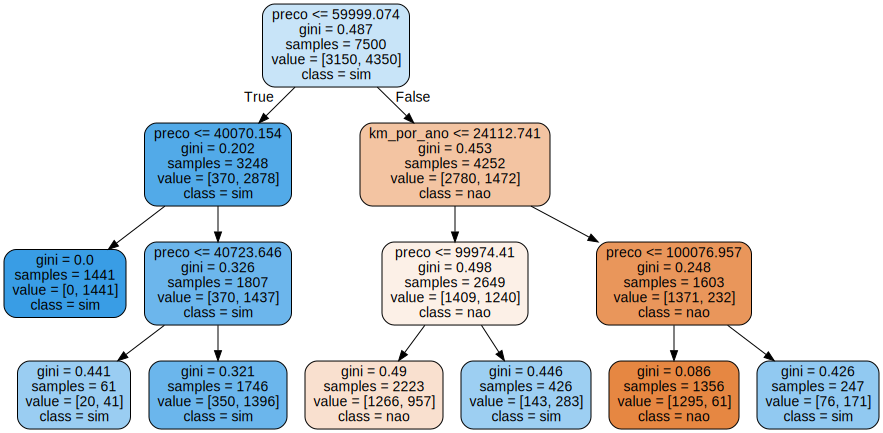

In [28]:
# Libs para vizualização da estrutura da árvore de decisão
from sklearn.tree import export_graphviz
import graphviz

# Colocar o nome das colunas na árvore
features = x.columns

dot_data = export_graphviz(model, 
                           filled=True, # colocar cor
                           rounded=True, # deixar arredondado
                           feature_names=features, # nomes das colunas
                           class_names=['nao', 'sim']) # resultado da classificação

grafico = graphviz.Source(dot_data)

grafico